##          Project 1: California Housing Price Prediction     
###                                    by SHAKTI NATH SAINI

In [51]:
####################################################################
''' Step 0: Import all libraries'''
####################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
####################################################################
'''Step 1: Load the data'''
####################################################################

# Step 1.1: Read the “housing.csv” file from the folder into the program

housingData = pd.read_excel(r'C:\Users\Shakti\Documents\Python Scripts\Projects\California Housing Price Prediction\housing.xlsx')

In [53]:
# Step 1.2: Print first few rows of this data

print('Print first few rows of this data - ')
print()
print(housingData.head())

Print first few rows of this data - 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [54]:
# Step 1.3: Extract input (X) and output (y) data from the datase

X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values

print()
print('X=',X)
print()
print('Y=',y)


X= [[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]

Y= [[452600]
 [358500]
 [352100]
 ...
 [ 92300]
 [ 84700]
 [ 89400]]


In [55]:
####################################################################
'''Step 2: Handle missing values:''' 
####################################################################

# Fill the missing values with the mean of the respective column

from sklearn.impute import KNNImputer

missingValueImputer = KNNImputer()
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)

print(housingData.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [56]:
####################################################################
'''Step 3: Encode categorical data:''' 
####################################################################

# Convert categorical column in the dataset to numerical data

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

In [57]:
####################################################################
'''Step 4: Split the dataset: Split the data into:''' 
####################################################################

# 80% training dataset and 20% test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [58]:
X_train.shape

(16512, 9)

In [59]:
X_test.shape

(4128, 9)

In [60]:
y_train.shape

(16512, 1)

In [61]:
y_test.shape

(4128, 1)

In [62]:
####################################################################
'''Step 5: Standardize data: Standardize training and test datasets'''
####################################################################

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)


In [63]:
####################################################################
'''Step 6: Perform Linear Regression'''
####################################################################

# Step 6.1: Perform Linear Regression on training data

from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Step 6.2: Predict output for test dataset using the fitted model

predictionLinear = linearRegression.predict(X_test)

In [65]:
# Step 6.3: Print root mean squared error (RMSE) from Linear Regression

from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear)

Root mean squared error (RMSE) from Linear Regression = 
0.3627237286232958


In [66]:
####################################################################
'''Step 7: BONUS EXERCISE: 
    Perform Linear Regression with one independent variable'''
####################################################################

# Step 7.1: Extract just the median_income column from the 
#           independent variables (from X_train and X_test)

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

In [67]:
# Step 7.2: Perform Linear Regression to predict housing values 
#           based on median_income

from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)

LinearRegression()

In [68]:
# Step 7.3: Predict output for test dataset using the fitted model

predictionLinear2 = linearRegression2.predict(X_test_median_income)

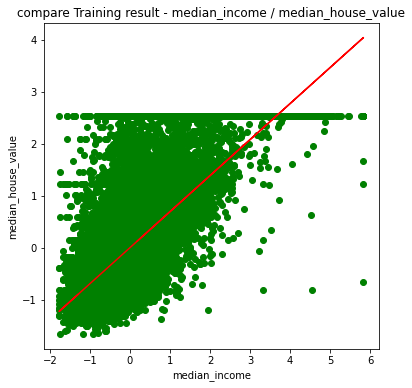

In [69]:
# Step 7.4: Plot the fitted model for training data as well as 
#           for test data to check if the fitted model satisfies the test data

# Step 7.4.1: Visualizing the Training set

plt.figure(figsize=(6,6))
plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

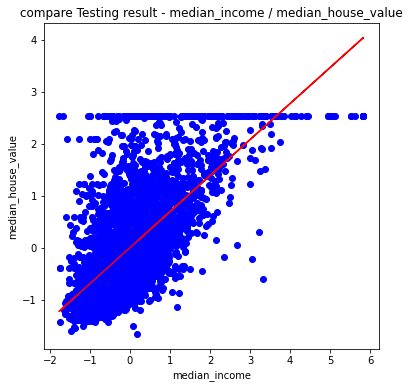

In [70]:
# Step 7.4.2: Visualizing the Testing set

plt.figure(figsize=(6,6))
plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()



####################################################################
'''                          End                          '''
####################################################################